In [1]:
# relevant imports
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
from matplotlib import rcParams
import rsatoolbox
import rsatoolbox.data as rsd # abbreviation to deal with dataset
import rsatoolbox.rdm as rsr
import os
import seaborn as sns
import sklearn as sk
import math
import pandas as pd
import pickle
import copy
import nibabel as nib
import re

In [2]:
# change the working directory to be the timecourse data
#os.chdir('/mnt/Data1/linjdata1/vswmda/scan_data/rsa/full_GLM_mgs_0.05_50/')
os.chdir('/gpfs/scratch/linjjiang/scan_data/rsa/full_GLM_mgs_topN/')
#os.chdir('/gpfs/scratch/linjjiang/scan_data/rsa/full_GLM_atlas_roi/')

In [3]:
subjects = ['f09','f10','f11','f12','f15','f16','f17','f18','f19']
epochs = ['delay','response','stimulus']
exp1_subjects = ['f09','f10','f11','f12','f15','f16']
exp2_subjects = ['f17','f18','f19']

In [4]:
# get ROI name
# # if full_GLM_atlas_roi
# order = ['area4-ju50',        
#           'v1-wang25','v2-wang25',
#           'ips0-wang15','ips1-wang15','ips2-wang15','ips3-wang15',
#           'ips4-wang15','ips5-wang15','spl1-wang15','ips-wang15',
#          'fef-wang25','spcs-md','ipcs-md','pmfg-md','amfg-md','ifg-md'
#           ] 
#          #'area8-hcp','area9-hcp','area9|46-hcp','area44|45|47l-hcp','fef-hcp',


# # for atlas_roi:
# order_full = ['area4-ju50',        
#           'v1-wang25','v2-wang25',
#           'ips0-wang15','ips1-wang15','ips2-wang15','ips3-wang15',
#           'ips4-wang15','ips5-wang15','spl1-wang15','ips-wang15',
#          'fef-wang25','spcs-md','ipcs-md','pmfg-md','amfg-md','ifg-md',
#               'area8-hcp','area9-hcp','area9|46-hcp','area44|45|47l-hcp','fef-hcp'
#           ] 
#          #'area8-hcp','area9-hcp','area9|46-hcp','area44|45|47l-hcp','fef-hcp',
    
    
# if full_GLM_mgs_xxx
order = ['area4', 'v1', 'v2', 'ips', 'fef', 'sfg', 'mfg', 'ifg',
         'ips0', 'ips1', 'ips2', 'ips3', 'ips4', 'ips5', 'spl1']
# for mgs roi:
order_full = order

In [5]:
# change the following as needed
roi_labels = {'area4': 'M1', 'v1': 'V1', 'v2': 'V2', 
              
              'ips0': 'IPS0', 'ips1': 'IPS1', 'ips2': 'IPS2', 
              'ips3': 'IPS3', 'ips4': 'IPS4', 'ips5': 'IPS5', 'spl1': 'SPL1',
              
          'ips': 'IPS', 'fef': 'FEF', 'sfg': 'SFG', 
          'mfg': 'MFG', 'ifg': 'IFG'}

# roi_labels = {'area4-ju50': 'M1-Julich', 'v1-wang25': 'V1-Wang25', 'v2-wang25': 'V2-Wang25', 
              
#               'ips0-wang15': 'IPS0-Wang15', 'ips1-wang15': 'IPS1-Wang15', 'ips2-wang15': 'IPS2-Wang15', 
#               'ips3-wang15': 'IPS3-Wang15', 'ips4-wang15': 'IPS4-Wang15', 'ips5-wang15': 'IPS5-Wang15', 
#               'spl1-wang15': 'SPL1-Wang15',
              
#           'ips-wang15': 'IPS-Wang15', 'fef-wang25': 'FEF-Wang25', 'spcs-md': 'sPCS-MD', 
#           'ipcs-md': 'iPCS-MD', 'amfg-md': 'aMFG-MD', 'pmfg-md': 'pMFG-MD','ifg-md': 'IFG-MD'}

# roi_order = list(roi_labels.values())
subj_labels = {index: subject for index, subject in enumerate(subjects, start=0)}
epoch_labels = {0: 'stimulus', 1: 'delay', 2: 'response'}

In [6]:
with open('rdm_crossnobis_comb_sess.pkg','rb') as f:
    RDM = pickle.load(f)

In [7]:
dis_val_all = pd.DataFrame()
      
for rdm in RDM:
    subj = rdm.rdm_descriptors['subj']
    roi = rdm.rdm_descriptors['roi']
    epoch = rdm.rdm_descriptors['epoch']
    conds = rdm.pattern_descriptors['conds']
    #print(subj,roi,session,epoch)


    a = rdm.get_matrices()[0]
    val = np.nanmean(a[np.where(~np.eye(a.shape[0],dtype=bool))])

#     # for L-R
#     labels = [x[-1] for x in conds]
#     rows_L = [i for i, label in enumerate(labels) if label == 'L']
#     cols_R = [i for i, label in enumerate(labels) if label == 'R']
#     val_LR = np.nanmean(a[np.ix_(rows_L, cols_R)])

#     # for W-T
#     labels = [x[-2] for x in conds]
#     rows_W = [i for i, label in enumerate(labels) if label == 'W']
#     cols_T = [i for i, label in enumerate(labels) if label == 'T']
#     val_WT = np.nanmean(a[np.ix_(rows_W, cols_T)])

#     # for ecc or CN
#     labels = [x[0] for x in conds]
#     rows_3_C = [i for i, label in enumerate(labels) if (label == '3') | (label == 'C')]
#     cols_5_N = [i for i, label in enumerate(labels) if (label == '5') | (label == 'N')]
#     val_ecc_or_CN = np.nanmean(a[np.ix_(rows_3_C, cols_5_N)])

    indices = np.array([[0, 2], [1, 3], [4, 6], [5, 7]])
    val_LR = np.nanmean([a[row, col] for row, col in indices])
    
    indices = np.array([[0, 1], [2, 3], [4, 5], [6, 7]])
    val_WT = np.nanmean([a[row, col] for row, col in indices])
    
    indices = np.array([[0, 4], [1, 5], [2, 6], [3, 7]])
    val_ecc = np.nanmean([a[row, col] for row, col in indices])
    
    indices = np.array([[0, 3], [1, 2], [4, 7], [5, 6]])
    val_LRWT = np.nanmean([a[row, col] for row, col in indices])
    
    indices = np.array([[0, 5], [1, 4], [2, 7], [3, 6]])
    val_eccWT = np.nanmean([a[row, col] for row, col in indices])
    
    indices = np.array([[0, 6], [1, 7], [2, 4], [3, 5]])
    val_eccLR = np.nanmean([a[row, col] for row, col in indices])
    
    indices = np.array([[0, 7], [1, 6], [2, 5], [3, 4]])
    val_all = np.nanmean([a[row, col] for row, col in indices]) 
    

    if subj[0] in exp1_subjects:
        df = pd.DataFrame({'rdm':[a],'data':[val],'data_LR':[val_LR],'data_WT':[val_WT],'data_ecc':[val_ecc],
                           'data_LRWT':[val_LRWT],'data_eccWT':[val_eccWT],'data_eccLR':[val_eccLR],'data_eccLRWT':[val_all],
                           'subj':subj,'roi':roi,'epoch':[epoch]})
    else:
        df = pd.DataFrame({'rdm':[a],'data':[val],'data_LR':[val_LR],'data_WT':[val_WT],'data_CN':[val_ecc],
                            'data_LRWT':[val_LRWT],'data_CNWT':[val_eccWT],'data_CNLR':[val_eccLR],'data_CNLRWT':[val_all],
                           'subj':subj,'roi':roi,'epoch':[epoch]})                
    dis_val_all = pd.concat([dis_val_all,df],axis=0)


In [8]:
print(dis_val_all)

                                                  rdm      data   data_LR  \
0   [[0.0, -0.7185203021843019, -0.051159177696733...  0.110024 -0.653435   
0   [[0.0, 0.515404632403981, 0.4463503047624071, ...  0.104163 -0.810780   
0   [[0.0, -1.7354505978536754, 1.0910847536610655... -0.359029 -1.036116   
0   [[0.0, 0.7894162058016149, 0.42766543268280177...  0.652943  0.272647   
0   [[0.0, 0.33821724657395613, 0.3018660694923435...  0.610283  0.215844   
..                                                ...       ...       ...   
0   [[0.0, 0.11884387625390168, -0.271506254326591... -0.075191 -0.043915   
0   [[0.0, 0.03563766165156882, -0.068495615468529...  0.035523  0.033870   
0   [[0.0, -0.1735682504028777, -0.100396125155188...  0.006742  0.068946   
0   [[0.0, -0.056393368149141726, -0.0624705979485... -0.036890 -0.116336   
0   [[0.0, 0.07410109480863394, -0.011491497511589...  0.089227  0.058803   

     data_WT  data_ecc  data_LRWT  data_eccWT  data_eccLR  data_eccLRWT sub

In [9]:
dis_val_all['roi'] = dis_val_all['roi'].map(roi_labels)
dis_val_all.index = range(len(dis_val_all))

In [15]:
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

def plot_group_dsm_star(dis_val_all, title, roi_labels, subj_labels, epoch_labels, data_column_name, 
                        session_palette, significance_df, aspect, ylim0, ylim1, h_offset):
    
    warnings.filterwarnings("ignore")
    roi_order = list(roi_labels.values())
    subj_order = list(subj_labels.values())

    # Define color-blind friendly palettes
    participant_palette = sns.color_palette("colorblind", dis_val_all['subj'].nunique())

    def scatter_and_lines(data, **kwargs):
        ax = plt.gca()

        # Plot scatter points
        subset = data
        x_coords = [roi_order.index(roi) for roi in subset['roi']]
        
        # Adding jitter to x coordinates
        jitter = np.random.uniform(-0.1, 0.1, size=len(x_coords))
        x_coords_jittered = x_coords + jitter

        sns.scatterplot(x=x_coords_jittered, y=subset[data_column_name], hue=subset['subj'], palette=participant_palette, 
                        hue_order=subj_order, edgecolor='black', s=15, ax=ax, alpha=1, **kwargs)
            
    # Function to add significance stars
    def add_significance_stars(ax, current_epoch):
        # Filter the significance_df for the current epoch
        epoch_significance_df = significance_df[significance_df['epoch'] == current_epoch]

        for i, row in epoch_significance_df.iterrows():
            if row['p_value'] < 0.05:
                roi = row['roi']
                
                roi_idx = roi_order.index(roi)
                x_coord = roi_idx
                y_coord = dis_val_all[(dis_val_all['roi'] == roi) & 
                                      (dis_val_all['epoch'] == current_epoch)][data_column_name].max() + 0.1

                if row['p_value'] < 0.001:
                    stars = '***'
                elif row['p_value'] < 0.01:
                    stars = '**'
                else:
                    stars = '*'

                ax.annotate(stars, (x_coord, y_coord), textcoords="offset points", xytext=(0, 5), 
                            ha='center', fontsize=10, color='black')

    def change_width(ax, new_value) :
        for patch in ax.patches :
            current_width = patch.get_width()
            diff = current_width - new_value

            # we change the bar width
            patch.set_width(new_value)

            # we recenter the bar
            patch.set_x(patch.get_x() + diff * .5)


    # Plotting
    task_epoch_order = ["stimulus", "delay"]
    plt.figure(figsize=(8, 16))  # Adjust size as needed
    g = sns.FacetGrid(dis_val_all, col="epoch", col_order=task_epoch_order, col_wrap=1, height=1.5, aspect=aspect)
    
    g.map_dataframe(sns.barplot, x='roi', y=data_column_name, order=roi_order, 
                    errorbar=None, dodge=False, palette=session_palette, zorder=1)

    # Adjusting the labels and titles
    g.set_axis_labels(" ", " ")
    g.set_titles(col_template="", row_template="")

    # Adjusting the legend
    for ax in g.axes.flat:
        if ax.legend_:
            ax.legend_.remove()
        ax.axhline(0, color='black', linestyle='--', linewidth=2)
        change_width(ax, 0.5)

    # Manually create a legend
    handles, labels = [], []
    for participant, color in zip(subj_labels.values(), participant_palette):
        handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, alpha=1, markersize=10, label=participant))

    g.map_dataframe(scatter_and_lines)

    # Add significance stars
    for ax, current_epoch in zip(g.axes.flat, task_epoch_order):
        plt.sca(ax)
        add_significance_stars(ax, current_epoch)

    # Adjusting font sizes for axes
    for ax in g.axes.flat:
        ax.set_xlabel(ax.get_xlabel(), fontsize=12)
        ax.set_ylabel(ax.get_ylabel(), fontsize=12)
        ax.set_title(ax.get_title(), fontsize=12)
        ax.tick_params(axis='x', labelsize=12)
        ax.tick_params(axis='y', labelsize=12)
        ax.set_ylim(ylim0, ylim1)

    plt.xticks(rotation=45)
    plt.subplots_adjust(hspace=0.5)

    plt.savefig(title, bbox_inches='tight', dpi=300)
    plt.show()

# Example call (replace with your actual variables)
# plot_group_dsm_star(dis_val_all, "title", roi_labels, subj_labels, epoch_labels, "data_column_name", 
#                     session_palette, significance_df, 1.5, 0, 1, 0.1)


In [16]:
from scipy.stats import ttest_1samp
from statsmodels.stats.multitest import multipletests

def ttest_crossnobis(df,colname):
    warnings.filterwarnings("ignore")
    # Assuming your dataframe is named dis_val_all

    # Define the df, epochs, and ROIs you want to analyze
    epochs = ['stimulus','delay'] #dis_val_all['epoch'].unique()
    rois = df['roi'].unique()

    results = []

    # Loop through each combination of session, epoch, and ROI

    for epoch in epochs:
        for roi in rois:
            # Filter the dataframe
            filtered_df = df[(df['epoch'] == epoch) &
                                      (df['roi'] == roi)]

            # Extract the 'data' values
            data_values = filtered_df[colname].dropna()

            if len(data_values) > 0:
                # Perform a one-sample t-test
                t_stat, p_value = ttest_1samp(data_values, 0, alternative='greater')
                dof = len(data_values)-1

                # Store the result
                results.append({'epoch': epoch, 'roi': roi, 'mean': data_values.mean(), 
                                't_stat': t_stat, 'p_value': p_value, 'dof': dof})

    # Convert results to a dataframe
    results_df = pd.DataFrame(results)
    
#     # Correct for multiple comparisons
#     p_values = results_df['p_value'].values.flatten()
#     corrected_p_values = multipletests(p_values, method='fdr_bh')[1]
#     results_df['p_value'] = corrected_p_values.reshape(-1, 1)
    
    # Filter the results to only include rows with p_value less than 0.05
    significant_results_df = results_df[results_df['p_value'] < 0.05]

    # Define custom order for epochs
    epoch_order = ['stimulus', 'delay']

    # Convert 'epoch' column to a categorical type with the custom order
    significant_results_df['epoch'] = pd.Categorical(significant_results_df['epoch'], categories=epoch_order, ordered=True)

    # Sort by the custom epoch order
    significant_results_df = significant_results_df.sort_values(by=['epoch'])

    # Print the significant results
    return significant_results_df


In [17]:
#session_palette = sns.color_palette("Blues",2)
session_palette= ['#A9A9A9'] #'#D3D3D3', 

In [18]:
selected_rois = ['M1','FEF','SFG','MFG','IFG']
selected_rois_key = ['area4','fef','sfg','mfg','ifg']
selected_epochs = ['stimulus','delay']
selected_epochs_key = [0,1]
df = dis_val_all[(dis_val_all['roi'].isin(selected_rois)) 
                  & (dis_val_all['epoch'].isin(selected_epochs))]

selected_roi_labels = {key: roi_labels[key] for key in selected_rois_key if key in roi_labels}
selected_epoch_labels = {key: epoch_labels[key] for key in selected_epochs_key if key in epoch_labels}

<Figure size 800x1600 with 0 Axes>

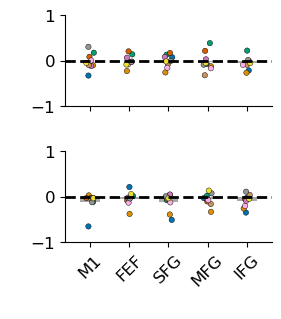

In [19]:
sig_df = ttest_crossnobis(df,'data_LR')
#results_df,sig_df1 = ttest_paired_sessions(df, 'data_LR', 'Session 1', 'Session 2')
# print(sig_df)
#print(sig_df1)

plot_group_dsm_star(df,'Fig3_frontal_LR_comb.png',selected_roi_labels,subj_labels,
               selected_epoch_labels,'data_LR',session_palette,sig_df,2,-1,1,0.6)

<Figure size 800x1600 with 0 Axes>

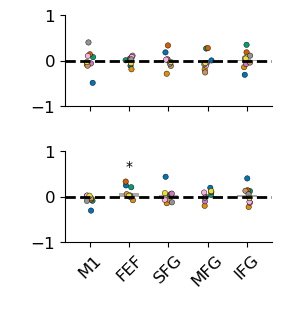

In [20]:
sig_df = ttest_crossnobis(df,'data_WT')
# results_df,sig_df1 = ttest_paired_sessions(df, 'data_WT', 'Session 1', 'Session 2')
# print(sig_df)
# print(sig_df1)

plot_group_dsm_star(df,'Fig3_frontal_WT_comb.png',selected_roi_labels,subj_labels,
               selected_epoch_labels,'data_WT',session_palette,sig_df,2,-1,1,0.6)

<Figure size 800x1600 with 0 Axes>

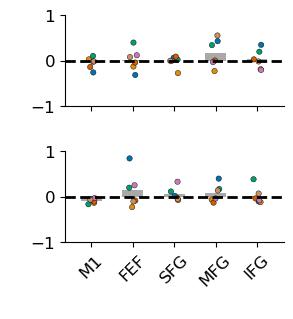

In [21]:
sig_df = ttest_crossnobis(df,'data_ecc')
# results_df,sig_df1 = ttest_paired_sessions(df, 'data_LR', 'Session 1', 'Session 2')
# print(sig_df)
# print(sig_df1)

plot_group_dsm_star(df,'Fig3_frontal_ecc_comb.png',selected_roi_labels,subj_labels,
               selected_epoch_labels,'data_ecc',session_palette,sig_df,2,-1,1,0.6)

<Figure size 800x1600 with 0 Axes>

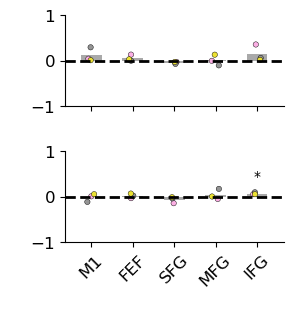

In [169]:
sig_df = ttest_crossnobis(df,'data_CN')
# results_df,sig_df1 = ttest_paired_sessions(df, 'data_CN', 'Session 1', 'Session 2')
# print(sig_df)
# print(sig_df1)

plot_group_dsm_star(df,'Fig3_frontal_CN_comb.png',selected_roi_labels,subj_labels,
               selected_epoch_labels,'data_CN',session_palette,sig_df,2,-1,1,0.6)

In [193]:
selected_rois = ['M1','IPS0','IPS1','IPS2','SPL1','IPS'] #'IPS3','IPS4','IPS5',
selected_rois_key = ['area4','ips0','ips1','ips2','spl1','ips'] #'ips3','ips4','ips5',dpi=1200
selected_epochs = ['stimulus','delay']
selected_epochs_key = [0,1]
df = dis_val_all[(dis_val_all['roi'].isin(selected_rois)) 
                  & (dis_val_all['epoch'].isin(selected_epochs))]

selected_roi_labels = {key: roi_labels[key] for key in selected_rois_key if key in roi_labels}
selected_epoch_labels = {key: epoch_labels[key] for key in selected_epochs_key if key in epoch_labels}

Empty DataFrame
Columns: [epoch, roi, mean, t_stat, p_value, dof]
Index: []


<Figure size 800x1600 with 0 Axes>

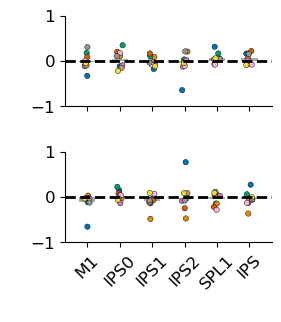

In [194]:
sig_df = ttest_crossnobis(df,'data_LR')
print(sig_df)


plot_group_dsm_star(df,'Fig2_parietal_LR.png',selected_roi_labels,subj_labels,
               selected_epoch_labels,'data_LR',session_palette,sig_df,2,-1,1,0.8)

       epoch   roi      mean    t_stat   p_value  dof
1   stimulus   IPS  0.117477  3.306783  0.005375    8
3   stimulus  IPS1  0.050624  1.936724  0.044397    8
5   stimulus  SPL1  0.121854  2.545440  0.017209    8
7      delay   IPS  0.187394  4.183839  0.001532    8
8      delay  IPS0  0.290796  2.837259  0.010952    8
9      delay  IPS1  0.166527  2.106505  0.034122    8
10     delay  IPS2  0.173427  3.038486  0.008050    8
11     delay  SPL1  0.143066  2.562464  0.016759    8


<Figure size 800x1600 with 0 Axes>

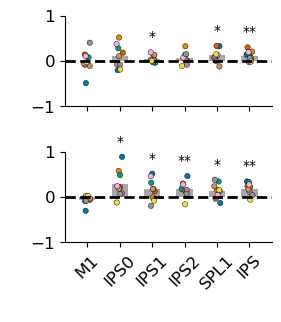

In [195]:
sig_df = ttest_crossnobis(df,'data_WT')

print(sig_df)


plot_group_dsm_star(df,'Fig2_parietal_WT.png',selected_roi_labels,subj_labels,
               selected_epoch_labels,'data_WT',session_palette,sig_df,2,-1,1,0.8)

       epoch   roi      mean    t_stat   p_value  dof
1   stimulus   IPS  0.368686  3.003195  0.014994    5
2   stimulus  IPS0  0.471743  4.475829  0.003272    5
3   stimulus  IPS1  0.231289  2.209902  0.039057    5
5   stimulus  SPL1  0.093672  4.697207  0.002675    5
7      delay   IPS  0.293033  2.895938  0.016975    5
8      delay  IPS0  0.233921  3.306375  0.010663    5
11     delay  SPL1  0.251113  2.428834  0.029733    5


<Figure size 800x1600 with 0 Axes>

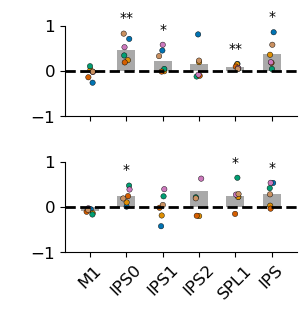

In [196]:
sig_df = ttest_crossnobis(df,'data_ecc')
print(sig_df)


plot_group_dsm_star(df,'Fig2_parietal_ecc.png',selected_roi_labels,subj_labels,
               selected_epoch_labels,'data_ecc',session_palette,sig_df,2,-1,1,0.8)

      epoch   roi      mean    t_stat   p_value  dof
3  stimulus  IPS1  0.049032  3.074409  0.045754    2


<Figure size 800x1600 with 0 Axes>

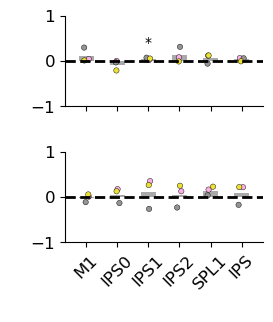

In [179]:
sig_df = ttest_crossnobis(df,'data_CN')
print(sig_df)


plot_group_dsm_star(df,'Fig2_parietal_CN.png',selected_roi_labels,subj_labels,
               selected_epoch_labels,'data_CN',session_palette,sig_df,2,-1,1,0.8)

In [197]:
selected_rois = ['M1','V1','V2']
selected_rois_key = ['area4','v1','v2']
selected_epochs = ['stimulus','delay']
selected_epochs_key = [0,1]
df = dis_val_all[(dis_val_all['roi'].isin(selected_rois)) 
                  & (dis_val_all['epoch'].isin(selected_epochs))]

selected_roi_labels = {key: roi_labels[key] for key in selected_rois_key if key in roi_labels}
selected_epoch_labels = {key: epoch_labels[key] for key in selected_epochs_key if key in epoch_labels}

      epoch roi      mean    t_stat   p_value  dof
1  stimulus  V1  0.153675  2.737065  0.012782    8
2  stimulus  V2  0.224358  3.293410  0.005483    8


<Figure size 800x1600 with 0 Axes>

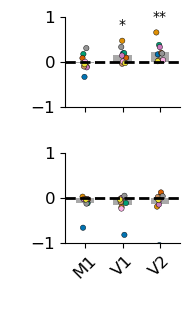

In [198]:
sig_df = ttest_crossnobis(df,'data_LR')
print(sig_df)


plot_group_dsm_star(df,'Fig1_visual_LR.png',selected_roi_labels,subj_labels,
               selected_epoch_labels,'data_LR',session_palette,sig_df,1.3,-1,1,0.85)

      epoch roi      mean    t_stat   p_value  dof
1  stimulus  V1  0.786455  3.188311  0.006418    8
2  stimulus  V2  1.075587  3.730465  0.002892    8


<Figure size 800x1600 with 0 Axes>

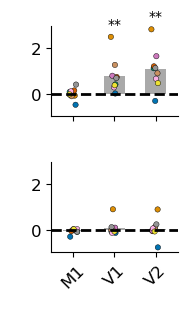

In [187]:
sig_df = ttest_crossnobis(df,'data_WT')
print(sig_df)


plot_group_dsm_star(df,'Fig1_visual_WT.png',selected_roi_labels,subj_labels,
               selected_epoch_labels,'data_WT',session_palette,sig_df,1.3,-1,3,0.85)

      epoch roi      mean    t_stat   p_value  dof
1  stimulus  V1  0.914675  7.497151  0.000334    5
2  stimulus  V2  1.858052  8.431315  0.000193    5


<Figure size 800x1600 with 0 Axes>

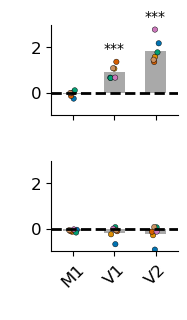

In [189]:
sig_df = ttest_crossnobis(df,'data_ecc')

print(sig_df)


plot_group_dsm_star(df,'Fig1_visual_ecc.png',selected_roi_labels,subj_labels,
               selected_epoch_labels,'data_ecc',session_palette,sig_df,1.3,-1,3,0.85)

Empty DataFrame
Columns: [epoch, roi, mean, t_stat, p_value, dof]
Index: []


<Figure size 800x1600 with 0 Axes>

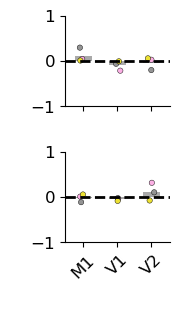

In [192]:
sig_df = ttest_crossnobis(df,'data_CN')

print(sig_df)


plot_group_dsm_star(df,'Fig1_visual_CN.png',selected_roi_labels,subj_labels,
               selected_epoch_labels,'data_CN',session_palette,sig_df,1.3,-1,1,0.85)